![](problem.png)

Advection of a rectangular profile (thin blue curve): Δx=0.2, u=1.

Initial condition: C=10 for -1≤x≤1 & C=0 else.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The initial condition and analytical function is the same as previous practice.

In [2]:
dx = 0.2
dt = 0.1
u = 1
t = np.arange(0, 16, dt)
x = np.arange(-20, 20, dx)

C_L = np.zeros((len(x), len(t)))
C_LW = np.zeros((len(x), len(t)))
C_real = np.zeros((len(x), len(t)))

In [3]:
for j in range(len(t)):
    for i in range(len(x)):
        if x[i] >= -1 + u * t[j] and x[i] <= 1 + u * t[j]:
            C_real[i, j] = 10
        else:
            C_real[i, j] = 0

In [4]:
for i in range(len(x)):
    if x[i] <= 1 and x[i] >= -1:
        C_L[i, 0] = 10
        C_LW[i, 0] = 10
    else:
        C_L[i, 0] = 0
        C_LW[i, 0] = 0

Lax scheme: $$
C_{m, n+1} = C_{m, n} - \frac{u \, \Delta t}{2 \, \Delta x} \left( C_{m+1, n} - C_{m-1, n} \right) + \frac{1}{2} \left( C_{m+1, n} - 2 C_{m, n} + C_{m-1, n} \right)
$$

Lax-Wendroff scheme:
$$
C_{m, n+1} = C_{m, n} - \frac{u \, \Delta t}{2 \, \Delta x} \left( C_{m+1, n} - C_{m-1, n} \right) + \frac{1}{2} \left( \frac{u \, \Delta t}{\Delta x} \right)^2 \left( C_{m+1, n} - 2 C_{m, n} + C_{m-1, n} \right)
$$ 

In [5]:
for n in range(0, len(t) - 1):
    for m in range(0, len(x) - 1):
        C_L[m, n + 1] = C_L[m, n] - u * dt / (2 * dx) * (C_L[m + 1, n] - C_L[m - 1, n]) + 1 / 2 * (C_L[m + 1, n] - 2 * C_L[m, n] + C_L[m - 1, n])
        C_LW[m, n + 1] = C_LW[m, n] - u * dt / (2 * dx) * (C_LW[m + 1, n] - C_LW[m - 1, n]) + 1 / 2 * (u * dt / dx) ** 2 * (C_LW[m + 1, n] - 2 * C_LW[m, n] + C_LW[m - 1, n])

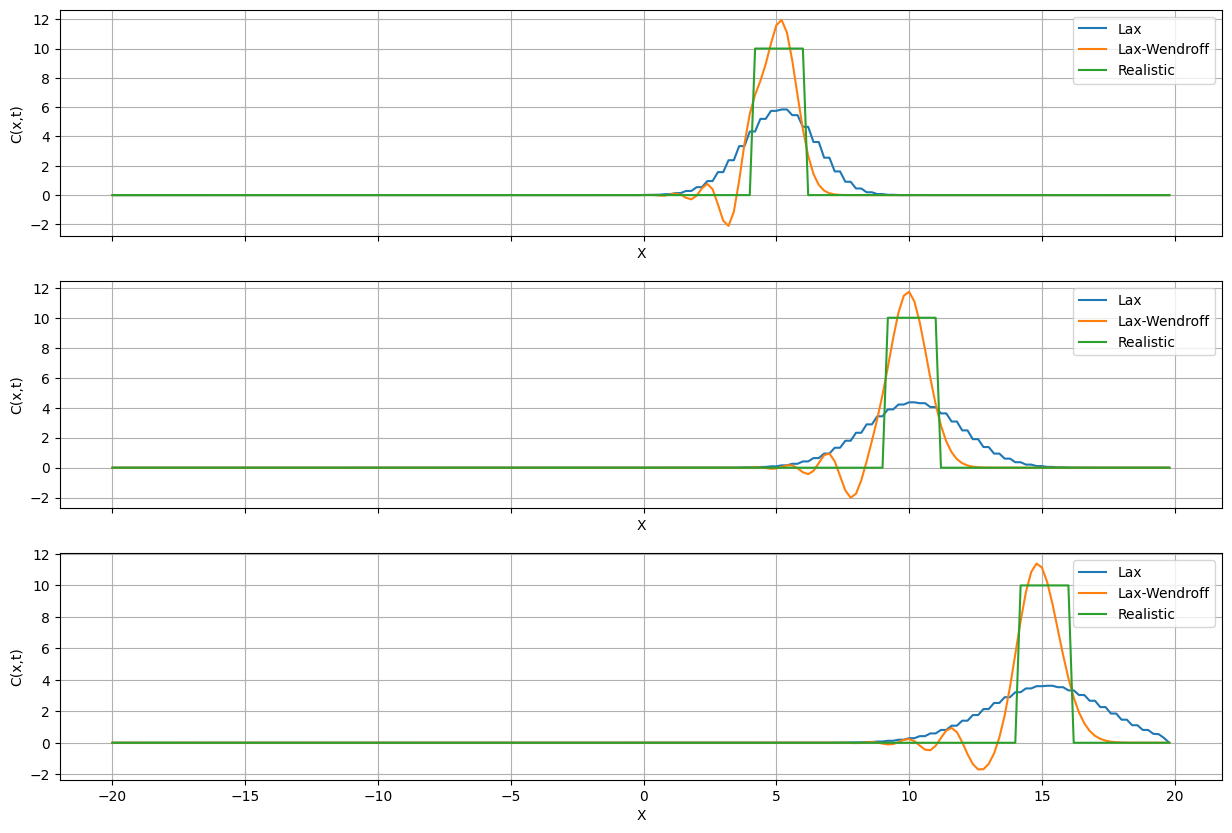

In [6]:
for i in range(len(t)):
    if t[i] == 5:
        t5 = i
    if t[i] == 10:
        t10 = i
    if t[i] == 15:
        t15 = i

tpoint = [t5, t10, t15]

fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i in range(0, 3):
    ax[i].plot(x, C_L[:, tpoint[i]], label='Lax')
    ax[i].plot(x, C_LW[:, tpoint[i]], label='Lax-Wendroff')
    ax[i].plot(x, C_real[:, tpoint[i]], label='Realistic')
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_ylabel('C(x,t)')
    ax[i].set_xlabel('X')

The two curves can show the moving peak but Lax curve cannot hold it for long and soon drop.

CFL criterion: $$\mid u\frac{\Delta t}{\Delta x} \mid \leq 1$$

$\rightarrow$ change $\Delta t$ to 0.5 to break the CFL criterion.

In [7]:
dt = 0.5

The following code to calculate CTCS, FCTS and FTUS are all from previous practice.

In [8]:
C_CTCS = np.zeros((len(x), len(t)))
C_FTCS = np.zeros((len(x), len(t)))
C_FTUS = np.zeros((len(x), len(t)))

In [9]:
for i in range(len(x)):
    if x[i] <= 1 and x[i] >= -1:
        C_CTCS[i, 0] = 10
        C_FTCS[i, 0] = 10
        C_FTUS[i, 0] = 10
    else:
        C_CTCS[i, 0] = 0
        C_FTCS[i, 0] = 0
        C_FTUS[i, 0] = 0

In [10]:
# CTCS
for m in range(1, len(x) - 1):
    C_CTCS[m, 1] = C_CTCS[m, 0] - u * dt / (2 * dx) * (C_CTCS[m + 1, 0] - C_CTCS[m - 1, 0])

for n in range(1, len(t) - 1):
    for m in range(1, len(x) - 1):
        C_CTCS[m, n + 1] = C_CTCS[m, n - 1] - (u * dt / dx) * (C_CTCS[m + 1, n] - C_CTCS[m - 1, n])

In [11]:
#FTCS 
for n in range(0, len(t) - 1):
    for m in range(1, len(x) - 1):
        C_FTCS[m,n+1]=C_FTCS[m,n]-u*dt/(2*dx)*(C_CTCS[m+1,n]-C_CTCS[m-1,n])

In [12]:
# FTUS
for n in range(0, len(t) - 1):
    for m in range(0, len(x) - 1):
        C_FTUS[m, n + 1] = C_FTUS[m, n] - (u * dt / dx) * (C_FTUS[m, n] - C_FTUS[m - 1, n])

Text(0.5, 0, 'X')

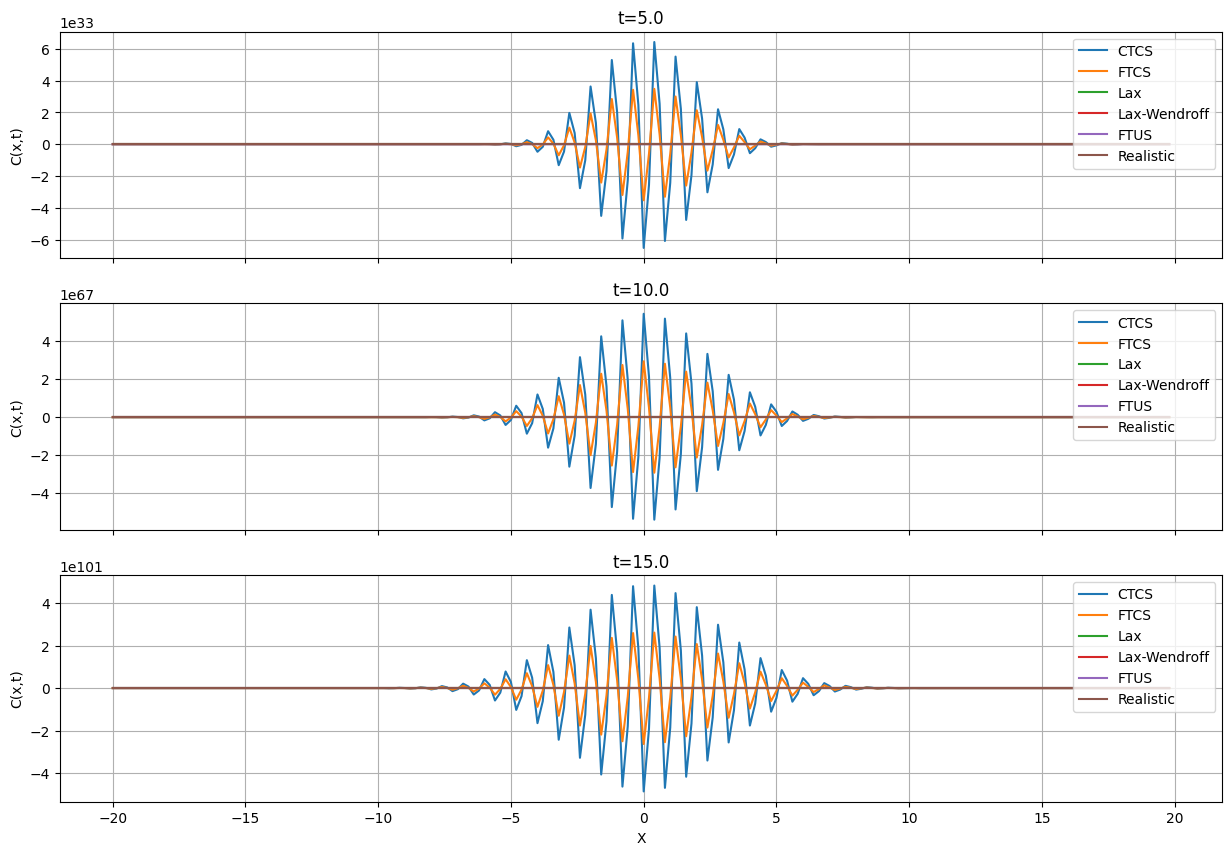

In [13]:
for i in range(len(t)):
    if t[i] == 5:
        t5 = i
    if t[i] == 10:
        t10 = i
    if t[i] == 15:
        t15 = i

tpoint = [t5, t10, t15]

fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i in range(0, 3):
    ax[i].set_title(r't=' + str(t[tpoint[i]]))
    ax[i].plot(x, C_CTCS[:, tpoint[i]], label='CTCS')
    ax[i].plot(x, C_FTCS[:, tpoint[i]], label='FTCS')
    ax[i].plot(x, C_L[:, tpoint[i]], label='Lax')
    ax[i].plot(x, C_LW[:, tpoint[i]], label='Lax-Wendroff')
    ax[i].plot(x, C_FTUS[:, tpoint[i]], label='FTUS')
    ax[i].plot(x, C_real[:, tpoint[i]], label='Realistic')
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_ylabel('C(x,t)')

ax[2].set_xlabel('X')

The CTCS curve are the most unstable with biggest oscillations. The FTCS curve also fluctuates so much that other curves cannot be seen. So I remove these two and plot others.

Text(0.5, 0, 'X')

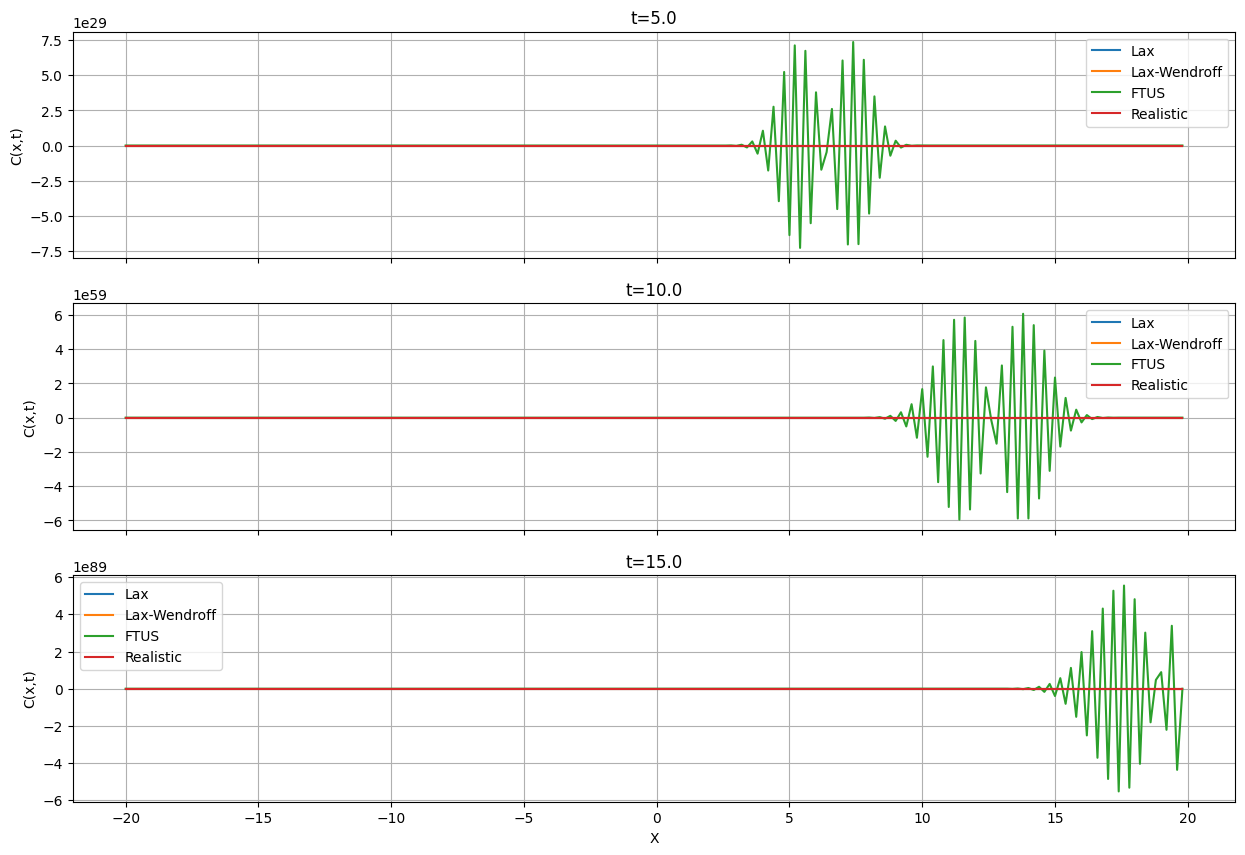

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i in range(0, 3):
    ax[i].set_title(r't=' + str(t[tpoint[i]]))
    ax[i].plot(x, C_L[:, tpoint[i]], label='Lax')
    ax[i].plot(x, C_LW[:, tpoint[i]], label='Lax-Wendroff')
    ax[i].plot(x, C_FTUS[:, tpoint[i]], label='FTUS')
    ax[i].plot(x, C_real[:, tpoint[i]], label='Realistic')
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_ylabel('C(x,t)')

ax[2].set_xlabel('X')

The FTUS curve can remove most of the fluctuations, and the range of oscillation values is also narrower. I continue to remove this.

Text(0.5, 0, 'X')

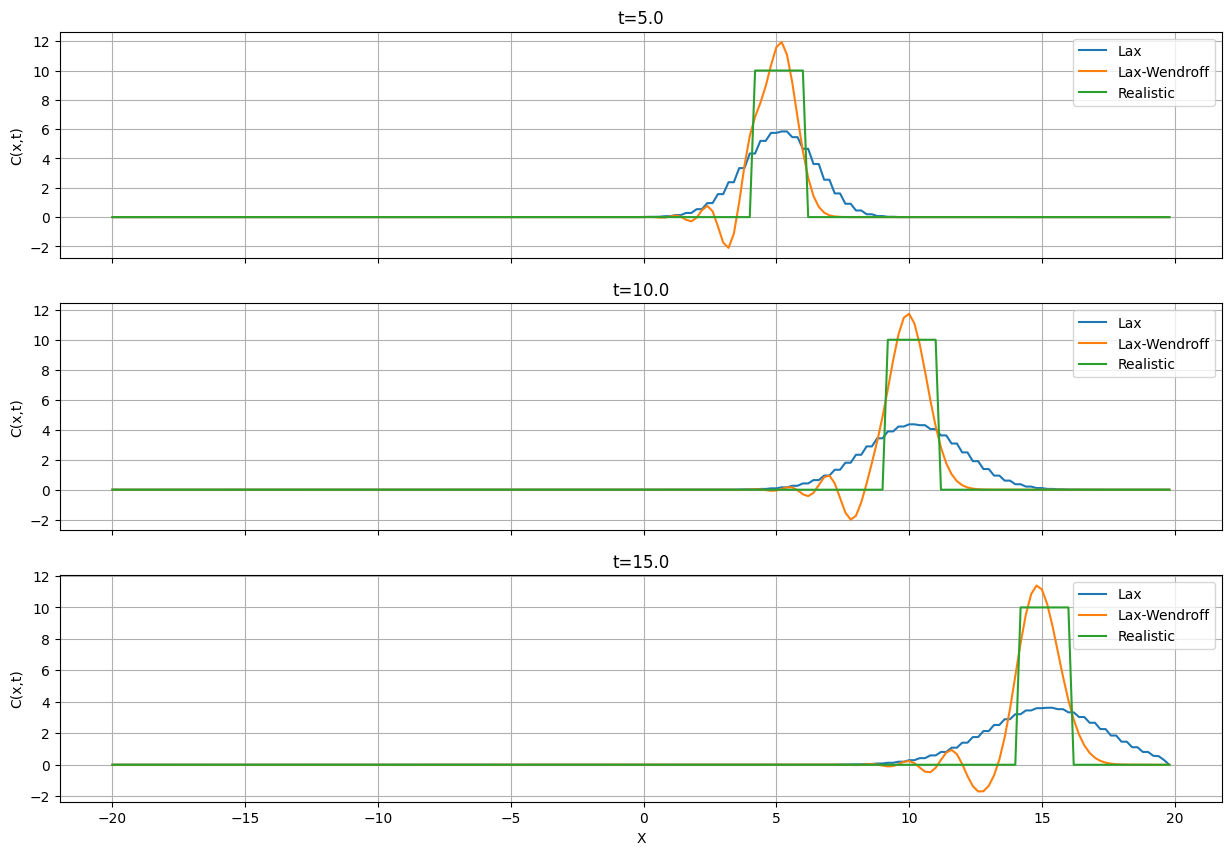

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i in range(0, 3):
    ax[i].set_title(r't=' + str(t[tpoint[i]]))
    ax[i].plot(x, C_L[:, tpoint[i]], label='Lax')
    ax[i].plot(x, C_LW[:, tpoint[i]], label='Lax-Wendroff')
    ax[i].plot(x, C_real[:, tpoint[i]], label='Realistic')
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_ylabel('C(x,t)')

ax[2].set_xlabel('X')

Compared to others above, these are the two most stable schemes.